# Exercise 1: Introduction to Machine Learning and Life Sciences

## Install packages

We start by installing the required packages into the same environment we use as the kernel for this Jupyter notebook using `pip`. If you are unfamiliar with Jupyter notebooks, please refer to: https://jupyter.org/ for setting up and using a Jupyter server.

## Import libraries and download dataset

In [1]:
import requests
import pandas as pd

from numpy import mean
from numpy import std

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

## Parse and Preprocess Data

Download the ELAV1 dataset (`ELAV1_PARCLIP.txt`) from https://github.com/BackofenLab/ML_LS_resources/blob/master/exercise_1_introduction/ELAVL1_PARCLIP.txt

We will featurize the sequences by creating k-mers with k=3, which will result in 4^3 = 64 predictor variables

In [2]:
# TODO: List all possible three-mers
three_mers = [  # AAA, AAC, AAG ...
    f"{a}{b}{c}"
    for a in ["A", "C", "U", "G"]
    for b in ["A", "C", "U", "G"]
    for c in ["A", "C", "U", "G"]
]

# Read the data
with open("ELAVL1_PARCLIP.txt") as f:
    data_text = f.read().split("\n>")

data = []

# TODO: Parse all data elements to get target variable and counts for k-mers
for read in data_text:
    dic = {'target': read.split('\n')[0].split('|')[-1]}
    seq = read.split('\n')[-1]
    for kmer in three_mers:
        dic[kmer] = seq.count(kmer)
    data.append(dic)
# convert to pandas dataframe
df = pd.DataFrame(data)
df

,target,AAA,AAC,AAU,AAG,ACA,ACC,ACU,ACG,AUA,...,GCU,GCG,GUA,GUC,GUU,GUG,GGA,GGC,GGU,GGG
0,1,3,0,3,1,2,3,0,0,1,...,0,0,0,1,2,0,2,0,1,1
1,0,3,1,4,1,2,1,1,0,4,...,1,0,1,0,1,3,3,0,2,0
2,0,2,3,1,0,3,2,0,0,1,...,1,0,1,1,2,0,1,1,0,0
3,0,1,2,1,4,1,2,0,0,1,...,1,0,1,0,0,1,3,1,0,0
4,1,2,0,5,0,1,0,1,0,2,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,0,1,0,1,3,2,0,1,...,3,1,1,1,0,0,0,2,2,2
9996,0,3,4,4,1,3,0,1,0,2,...,1,0,0,0,1,2,0,2,2,0
9997,0,2,0,1,2,3,1,2,0,3,...,0,0,3,0,0,1,0,0,1,0
9998,0,1,1,0,1,0,3,1,0,0,...,3,0,0,1,1,2,1,3,2,2


## Construct Classifier Models

We will now train a simple machine learning classifier on the data. We can select and implement a simple classifier easily from scikit-learn. We will first format our dataset from before by splitting the dataset into a train and test split using `train_test_split()` with the stratified option to ensure class balance is taken into account when splitting the dataset. 

For more information, refer to https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [3]:
# TODO: Prepare training and test splits

Then select a classifier from scikit-learn. One possible choice is the Random Forest Classifier implementation at https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html. Construct this classifier and then call the `fit()` function on it and pass the training samples, `X_train` and the targets, `y_train`

In [4]:
# TODO: Define a classifier and fit it to the training data
X = df.iloc[:, 1:]
y = df["target"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=100
)

Evaluate the trained classifer on our test data, obtained from the stratified train-test split before. To evaluate our model on the test data, we must first obtain its predictions using `predict()` and passing the test samples, `X_test`. We then compute the following evaluation metrics using these predictions and the test labels, `y_test`: AUCROC, accuracy, precision, recall, and f1-score.

In [5]:
# TODO: Make predictions and compute metrics

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

dtc_pred = dtc.predict(X_test)
print('Metrics for decision tree:')
print(f'AUROC: {metrics.roc_auc_score(y_test, dtc_pred)}')
print(f'Accuracy: {metrics.accuracy_score(y_test, dtc_pred)}')
print(f'Precision: {metrics.precision_score(y_test, dtc_pred)}')
print(f'Recall: {metrics.recall_score(y_test, dtc_pred)}')
print(f'F1: {metrics.f1_score(y_test, dtc_pred)}')
print('\n\n')

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)


print('Metrics for k neighbors:')
print(f'AUROC: {metrics.roc_auc_score(y_test, knn_pred)}')
print(f'Accuracy: {metrics.accuracy_score(y_test, knn_pred)}')
print(f'Precision: {metrics.precision_score(y_test, knn_pred)}')
print(f'Recall: {metrics.recall_score(y_test, knn_pred)}')
print(f'F1: {metrics.f1_score(y_test, knn_pred)}')

Metrics for decision tree:
AUROC: 0.6996666666666667
Accuracy: 0.6996666666666667
Precision: 0.6987392169873922
Recall: 0.702
F1: 0.7003658131027601



Metrics for k neighbors:
AUROC: 0.7566666666666666
Accuracy: 0.7566666666666667
Precision: 0.7267373380447585
Recall: 0.8226666666666667
F1: 0.7717323327079425


Now implement, train, and evaluate another classfier from scratch to compare their performance. This time, train the model using 5-fold cross-validation and then evaluate it on the average of the 5 runs: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [6]:
# TODO: train another classifier and compute metrics with cross-validation to compare with the previous one

from sklearn.model_selection import cross_val_score


Lr = LogisticRegression(max_iter=1000)

kf = KFold(n_splits=5)

scores = cross_val_score(Lr, X, y, cv=kf)

print("Cross-validation scores:", scores)
print("Average accuracy:", mean(scores))

Cross-validation scores: [0.774  0.7955 0.7975 0.795  0.797 ]
Average accuracy: 0.7918000000000001


## Multi-layer perceptron

Implement and train an MLP as a classifier and compare it to the previous two methods.

In [7]:
# TODO: Define hyperparameters


input_size = X_train.shape[1]
hidden_size = 64
output_size = 2
learning_rate = 0.001
batch_size = 128
epochs = 5

# TODO: Define the MLP model (use torch.nn.Module)
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        # Define the first fully connected layer
        self.fc1 = nn.Linear(input_size, hidden_size)
        # Define the output layer
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Pass input through the first layer and apply ReLU activation
        x = F.relu(self.fc1(x))
        # Pass the result through the output layer
        x = self.fc2(x)
        return x


# TODO : Prepare data for PyTorch (convert to tensors)

X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float)

y_train = torch.tensor(y_train.to_numpy(), dtype=torch.long)

X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.long)

# TODO: Create a DataLoader for batch processing
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# TODO: Initialize the MLP model
model = MLP(input_size, hidden_size, output_size)

# TODO: Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_losses = []
test_losses = []

# TODO: define function to evaluate the model on the test set
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    all_labels = []
    all_preds = []
    all_probs = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            all_labels.extend(labels.numpy())
            all_preds.extend(predicted.numpy())
            all_probs.extend(F.softmax(outputs, dim=1)[:, 1].cpu().numpy())

    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)
    all_probs = np.array(all_probs)

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    auroc = roc_auc_score(all_labels, all_probs, multi_class='ovo')
    average_test_loss = test_loss / len(test_loader)

    return average_test_loss, accuracy, precision, recall, f1, auroc

# TODO: Train the MLP
for epoch in range(epochs):
    running_train_loss = 0
    for inputs, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = model(inputs)
        # Compute loss
        loss = criterion(outputs, labels)
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()

    # Calculate average training loss for the epoch
    average_train_loss = running_train_loss / len(train_loader)
    train_losses.append(average_train_loss)
    
    # Evaluate on test data
    print("Evaluating on test data")
    model.eval()  # Set the model to evaluation mode
    average_test_loss, accuracy, precision, recall, f1, auroc = evaluate_model(model, test_loader, criterion)
    print("AUC-ROC:", auroc)
    test_losses.append(average_test_loss)
    
    # Print the losses for each epoch
    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {average_train_loss:.4f}, Test Loss: {average_test_loss:.4f}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, AUROC: {auroc:.4f}")

print("Training complete!")


Evaluating on test data
AUC-ROC: 0.8657577777777776
Epoch [1/5], Train Loss: 0.5056, Test Loss: 0.4564
Accuracy: 0.7920, Precision: 0.7984, Recall: 0.7920, F1: 0.7909, AUROC: 0.8658
Evaluating on test data
AUC-ROC: 0.8704768888888887
Epoch [2/5], Train Loss: 0.4615, Test Loss: 0.4472
Accuracy: 0.7890, Precision: 0.7892, Recall: 0.7890, F1: 0.7890, AUROC: 0.8705
Evaluating on test data
AUC-ROC: 0.8717017777777778
Epoch [3/5], Train Loss: 0.4536, Test Loss: 0.4427
Accuracy: 0.7893, Precision: 0.7900, Recall: 0.7893, F1: 0.7892, AUROC: 0.8717
Evaluating on test data
AUC-ROC: 0.8731182222222222
Epoch [4/5], Train Loss: 0.4493, Test Loss: 0.4414
Accuracy: 0.7987, Precision: 0.8028, Recall: 0.7987, F1: 0.7980, AUROC: 0.8731
Evaluating on test data
AUC-ROC: 0.8736088888888889
Epoch [5/5], Train Loss: 0.4459, Test Loss: 0.4394
Accuracy: 0.7930, Precision: 0.7941, Recall: 0.7930, F1: 0.7928, AUROC: 0.8736
Training complete!


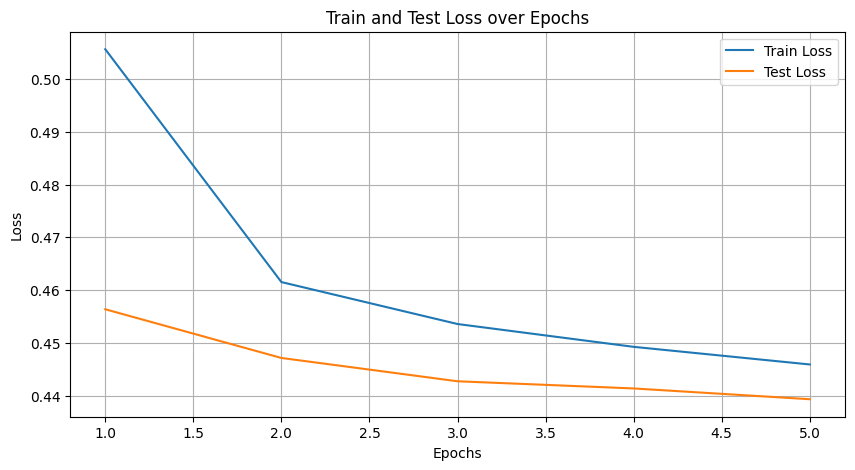

: 

In [ ]:
# TODO: Plot the training and test losses (use matplotlib)
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.title('Train and Test Loss over Epochs')
plt.legend()
plt.show()

# Improve the performance 

After comparing the performances of the previous three classifers, explore other techniques, architectures, and strategies to further improve the final performance.

# TODO: Improve the performance then evaluate it using the same metrics and compare with previous methods

From model_test.py we got the followed metrics with both models from choosen for number 2 and with kmer size 2:

Metrics for decision tree:
AUROC: 0.7003333333333334
Accuracy: 0.7003333333333334
Precision: 0.7018132975151108
Recall: 0.6966666666666667
F1: 0.6992305118768819



Metrics for k neighbors:
AUROC: 0.7696666666666667
Accuracy: 0.7696666666666667
Precision: 0.7461959829580036
Recall: 0.8173333333333334
F1: 0.7801463569837734

From model_test.py we got the followed metrics with both models from choosen for number 2 and with kmer size 4:

Metrics for decision tree:
AUROC: 0.6986666666666667
Accuracy: 0.6986666666666667
Precision: 0.6986666666666667
Recall: 0.6986666666666667
F1: 0.6986666666666667



Metrics for k neighbors:
AUROC: 0.7633333333333334
Accuracy: 0.7633333333333333
Precision: 0.7199331848552338
Recall: 0.862
F1: 0.7845873786407768

From model_test.py we got the followed metrics with both models from choosen for number 2 and with kmer size 5:

Metrics for decision tree:
AUROC: 0.696
Accuracy: 0.696
Precision: 0.6991869918699187
Recall: 0.688
F1: 0.6935483870967742



Metrics for k neighbors:
AUROC: 0.7626666666666666
Accuracy: 0.7626666666666667
Precision: 0.7049947970863684
Recall: 0.9033333333333333
F1: 0.7919345412039743

From model_test.py we got the followed metrics with both models from choosen for number 2 and with kmer size 6:

Metrics for decision tree:
AUROC: 0.7126666666666666
Accuracy: 0.7126666666666667
Precision: 0.7243319268635724
Recall: 0.6866666666666666
F1: 0.7049965776865161



Metrics for k neighbors:
AUROC: 0.7273333333333334
Accuracy: 0.7273333333333334
Precision: 0.6660175267770204
Recall: 0.912
F1: 0.7698368036015758